BOWLING STATS WITH VISUALIZATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../Cleaned_Dataset/cleaned_wpl_deliveries.csv')

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_16912\366438240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="Reds_r")


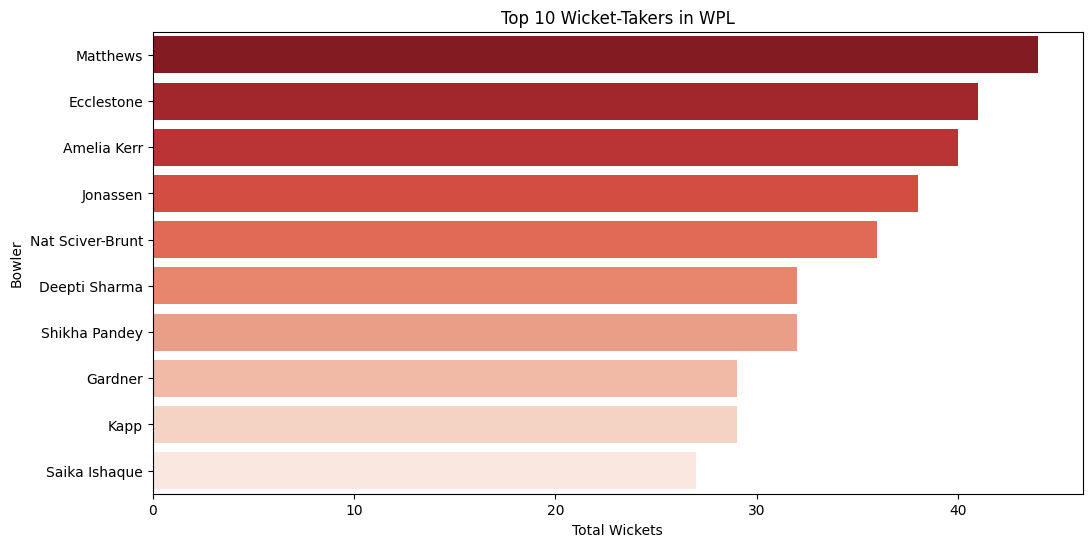

In [7]:
top_wicket_takers = df[df["player_dismissed"].notna()].groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="Reds_r")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 10 Wicket-Takers in WPL")
plt.show()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          15375 non-null  int64 
 1   season            15375 non-null  int64 
 2   match_no          15375 non-null  int64 
 3   date              15375 non-null  object
 4   venue             15375 non-null  object
 5   batting_team      15375 non-null  object
 6   bowling_team      15375 non-null  object
 7   innings           15375 non-null  int64 
 8   over              15375 non-null  int64 
 9   striker           15375 non-null  object
 10  bowler            15375 non-null  object
 11  runs_of_bat       15375 non-null  int64 
 12  extras            15375 non-null  int64 
 13  wide              15375 non-null  int64 
 14  legbyes           15375 non-null  int64 
 15  byes              15375 non-null  int64 
 16  noballs           15375 non-null  int64 
 17  wicket_type 

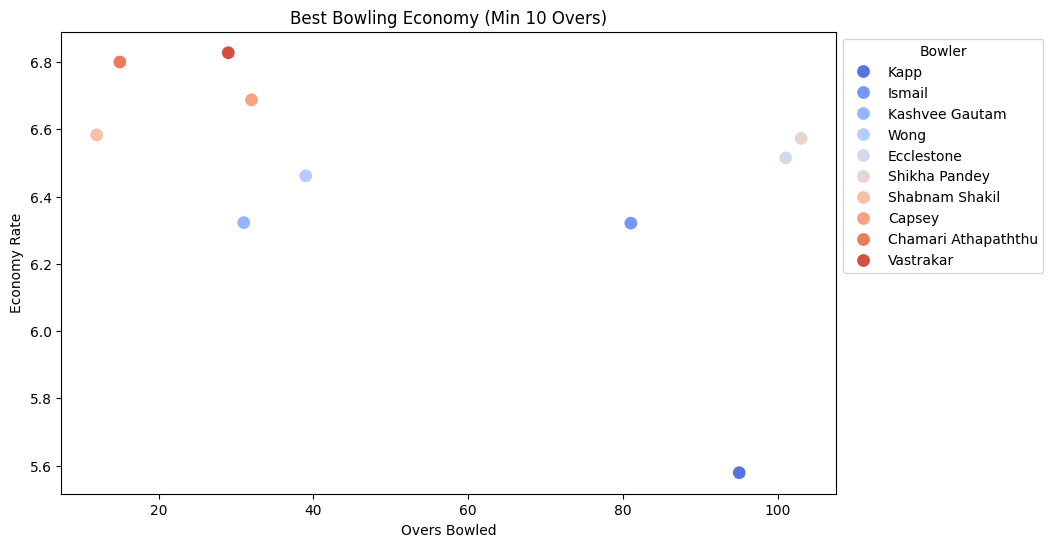

In [9]:
bowler_stats = df.groupby("bowler").agg(
    runs_given=("runs_of_bat", "sum"),
    balls_bowled=("match_id", "count")
).reset_index()

bowler_stats["overs"] = bowler_stats["balls_bowled"] // 6
bowler_stats = bowler_stats[bowler_stats["overs"] >= 10]
bowler_stats["economy"] = bowler_stats["runs_given"] / bowler_stats["overs"]

best_economy = bowler_stats.sort_values(by="economy").head(10)

plt.figure(figsize=(10,6))
sns.scatterplot(x=best_economy["overs"], y=best_economy["economy"], hue=best_economy["bowler"], palette="coolwarm", s=100)
plt.xlabel("Overs Bowled")
plt.ylabel("Economy Rate")
plt.title("Best Bowling Economy (Min 10 Overs)")
plt.legend(title="Bowler", bbox_to_anchor=(1,1))
plt.show()


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_16912\2569502373.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_over_wickets.values, y=death_over_wickets.index, palette="Purples_r")


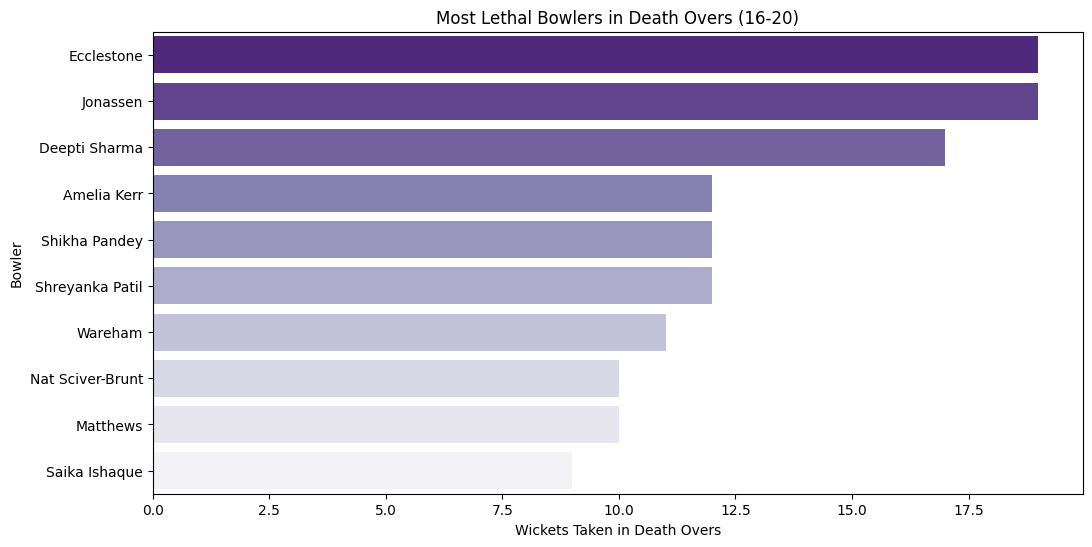

In [10]:
death_overs = df[(df["over"] >= 16) & (df["over"] <= 20)]
death_over_wickets = death_overs[death_overs["player_dismissed"].notna()].groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=death_over_wickets.values, y=death_over_wickets.index, palette="Purples_r")
plt.xlabel("Wickets Taken in Death Overs")
plt.ylabel("Bowler")
plt.title("Most Lethal Bowlers in Death Overs (16-20)")
plt.show()


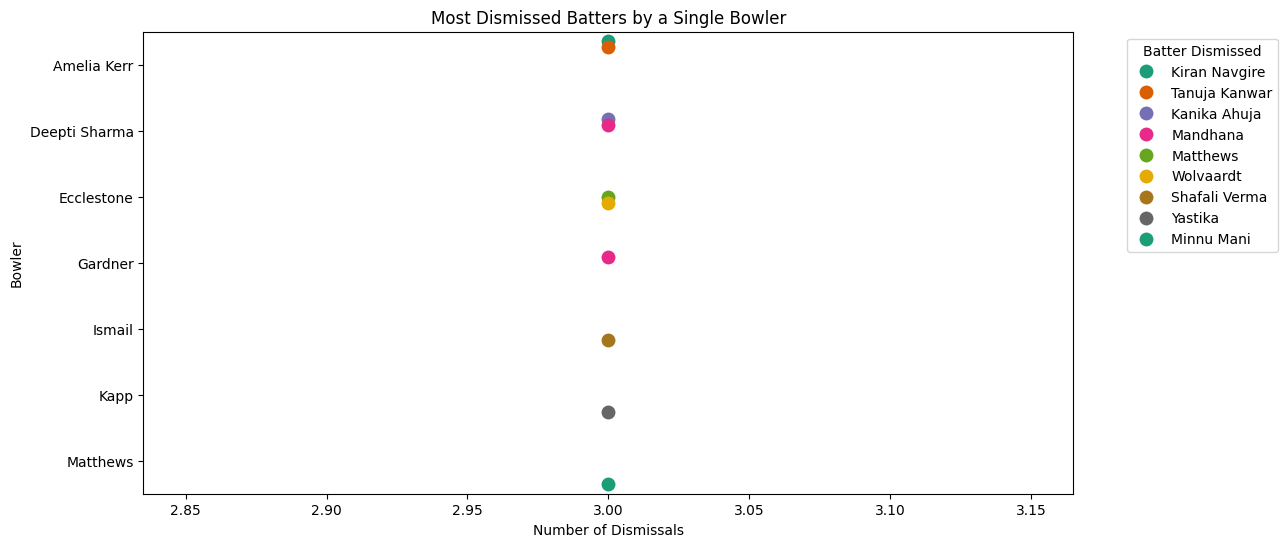

In [14]:
plt.figure(figsize=(12, 6))

# Plot strip plot for better readability
sns.stripplot(x="dismissals", y="bowler", hue="player_dismissed", data=top_dismissals, 
              jitter=True, dodge=True, size=10, palette="Dark2")

plt.xlabel("Number of Dismissals")
plt.ylabel("Bowler")
plt.title("Most Dismissed Batters by a Single Bowler")
plt.legend(title="Batter Dismissed", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
